Assignment Question: 
Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the 
classification algorithms discussed in the session)

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
data = pd.read_excel("iris.xls")

In [3]:
# Display first few data
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

In [4]:
data.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.Classification.nunique()

3

In [6]:
data.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [7]:
data.shape

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Basic Statistical Computations
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
# find duplicate rows
data[data.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
# Drop duplicate
data = data.drop_duplicates()

In [13]:
data[data.duplicated()]

,SL,SW,PL,PW,Classification


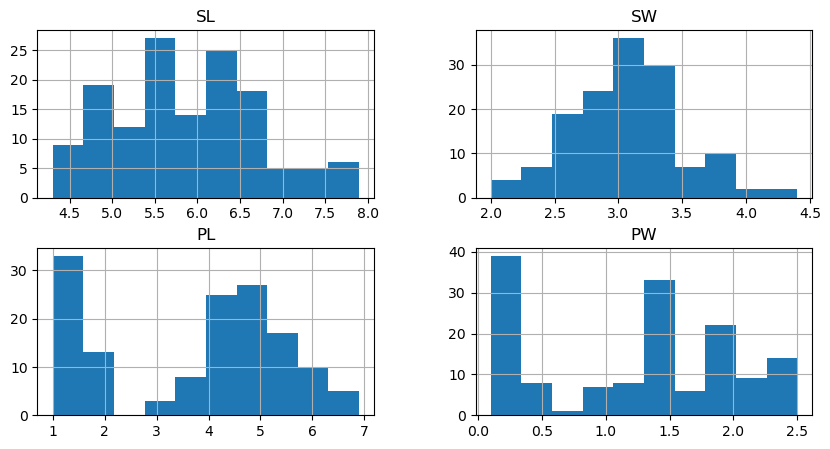

In [14]:
# histograms
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

In [15]:
# handling null values in SL, SW, PL columns
# SL, SW, PL being sightly skewed, replace null with median
for col in ['SL','SW','PL']:
    data[col]=data[col].fillna(data[col].median())

In [16]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Label Encoding

In [17]:
# Label encoding 'Classification' column which is in string format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Correlation

In [18]:
# Correlation between different columns
data.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.098734,0.828716,0.799399,0.774153
SW,-0.098734,1.000000,-0.405123,-0.337745,-0.402077
PL,0.828716,-0.405123,1.000000,0.934041,0.925788
PW,0.799399,-0.337745,0.934041,1.000000,0.955693
Classification,0.774153,-0.402077,0.925788,0.955693,1.000000


<AxesSubplot: >

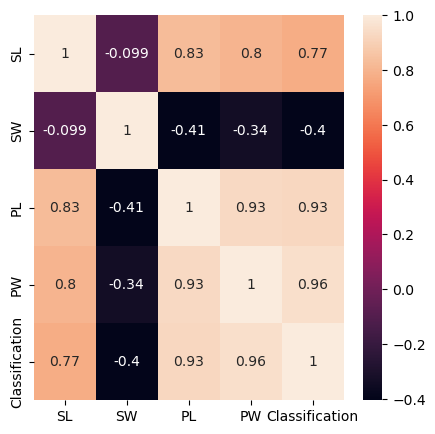

In [19]:
# heatmap
corr = data.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

### Classification

In [20]:
# split data into feature and target
x = data.drop(['Classification'], axis=1)
y = data['Classification']

In [21]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size = 0.20, )

# Classification models

### 1. Logistic Regression model

In [22]:
# multinomial Logistic Regression  -- since target column has more that two outcomes
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# Fit the model on the training data
model.fit(x_train,y_train)
# Predict values
y_pred_lr = model.predict(x_test)
y_pred_lr

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

##### Summarizing the performance of the alogorithm

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
conf_m_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:\n',conf_m_lr)
clas_rpt_lr = classification_report(y_test, y_pred_lr)
print('Classification Report:\n', clas_rpt_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy of Logistic Regression model : ', acc_lr)

from sklearn.metrics import precision_recall_fscore_support as score
precision_lr,recall_lr,fscore_lr,support_lr=score(y_test,y_pred_lr,average='macro')
print('Precision of Logistic Regression model : ', precision_lr)
print('Recall of Logistic Regression model : ', recall_lr)
print('F-score of Logistic Regression model : ', fscore_lr)

Confusion Matrix:
 [[11  0  0]
 [ 1  8  1]
 [ 0  1  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.89      0.80      0.84        10
           2       0.89      0.89      0.89         9

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Accuracy of Logistic Regression model :  0.9
Precision of Logistic Regression model :  0.898148148148148
Recall of Logistic Regression model :  0.8962962962962964
F-score of Logistic Regression model :  0.8958386303924062


### 2. k-Nearest Neighbors (kNN) Model

In [24]:
# Multiclass KNN
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

C:\Users\sobhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sobhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

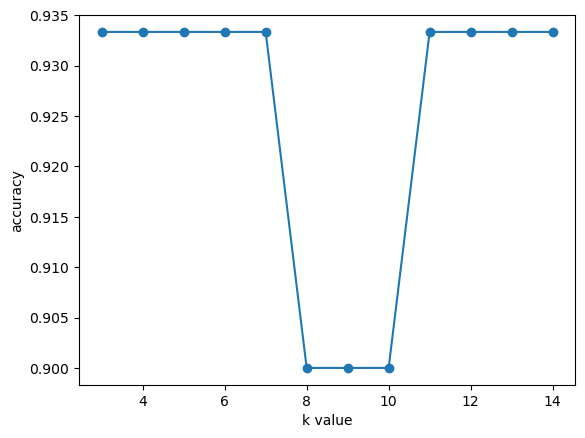

In [25]:
print(metric_k)

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid

In [26]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred_k = model.predict(x_test)
acc = accuracy_score(y_test,y_pred_k)
metric_k.append(acc)

C:\Users\sobhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


##### Summarizing the performance of the alogorithm

In [27]:
conf_m_k= confusion_matrix(y_test, y_pred_k)
print('Confusion Matrix:\n',conf_m_k)
clas_rpt_k = classification_report(y_test, y_pred_k)
print('Classification Report:\n', clas_rpt_k)
acc_k = accuracy_score(y_test, y_pred_k)
print('Accuracy: ', acc_k)

from sklearn.metrics import precision_recall_fscore_support as score
precision_k,recall_k,fscore_k,support_k=score(y_test,y_pred_lr,average='macro')
print('Precision of kNN model : ',precision_k)
print('Recall of kNN model : ',recall_k)
print('F-score of kNN model : ',fscore_k)

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy:  0.9333333333333333
Precision of kNN model :  0.898148148148148
Recall of kNN model :  0.8962962962962964
F-score of kNN model :  0.8958386303924062


# Support Vector Machines (SVM) Classifier
### i. SVC with Linear Kernel

In [28]:
# import svm classifier 
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train, y_train)
y_pred_SVClr = svmclf.predict(x_test)
y_pred_SVClr

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

##### Summarizing the performance of the alogorithm

In [29]:
conf_m_SVClr = confusion_matrix(y_test, y_pred_SVClr)
print('Confusion Matrix:\n',conf_m_SVClr)
clas_rpt_SVClr = classification_report(y_test, y_pred_SVClr)
print('Classification Report:\n', clas_rpt_SVClr)
acc_SVClr = accuracy_score(y_test, y_pred_SVClr)
print('Accuracy: ', acc_SVClr)

from sklearn.metrics import precision_recall_fscore_support as score

precision_SVClr,recall_SVClr,fscore_SVClr,support_SVClr=score(y_test,y_pred_lr,average='macro')
print('Precision of SVM model with linear kernel : {}'.format(precision_SVClr))
print('Recall of SVM model with linear kernel : {}'.format(recall_SVClr))
print('F-score of SVM model with linear kernel : {}'.format(fscore_SVClr))

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy:  0.9666666666666667
Precision of SVM model with linear kernel : 0.898148148148148
Recall of SVM model with linear kernel : 0.8962962962962964
F-score of SVM model with linear kernel : 0.8958386303924062


### ii. SVC with rbf Kernel

In [30]:
svmclf = SVC(kernel = 'rbf')
svmclf.fit(x_train, y_train)
y_pred_SVCr = svmclf.predict(x_test)
y_pred_SVCr

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

##### Summarizing the performance of the alogorithm

In [31]:
conf_m_SVCr = confusion_matrix(y_test, y_pred_SVCr)
print('Confusion Matrix:\n',conf_m_SVCr)
clas_rpt_SVCr = classification_report(y_test, y_pred_SVCr)
print('Classification Report:\n', clas_rpt_SVCr)
acc_SVCr = accuracy_score(y_test, y_pred_SVCr)
print('Accuracy: ', acc_SVCr)

from sklearn.metrics import precision_recall_fscore_support as score

precision_SVCr,recall_SVCr,fscore_SVCr,support_SVCr=score(y_test,y_pred_lr,average='macro')
print('Precision of SVM model with rbf kernel : {}'.format(precision_SVCr))
print('Recall of SVM model with rbf kernel : {}'.format(recall_SVCr))
print('F-score of SVM model with rbf kernel : {}'.format(fscore_SVCr))

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  2  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      0.90      0.86        10
           2       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30

Accuracy:  0.9
Precision of SVM model with rbf kernel : 0.898148148148148
Recall of SVM model with rbf kernel : 0.8962962962962964
F-score of SVM model with rbf kernel : 0.8958386303924062


### iii. SVC with poly Kernel

In [32]:
svmclf = SVC(kernel = 'poly')
svmclf.fit(x_train, y_train)
y_pred_SVCp = svmclf.predict(x_test)
y_pred_SVCp

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

##### Summarizing the performance of the alogorithm

In [33]:
conf_m_SVCp = confusion_matrix(y_test, y_pred_SVCp)
print('Confusion Matrix:\n',conf_m_SVCp)
clas_rpt_SVCp = classification_report(y_test, y_pred_SVCp)
print('Classification Report:\n', clas_rpt_SVCp)
acc_SVCp = accuracy_score(y_test, y_pred_SVCp)
print('Accuracy: ', acc_SVCp)

from sklearn.metrics import precision_recall_fscore_support as score

precision_SVCp,recall_SVCp,fscore_SVCp,support_SVCp=score(y_test,y_pred_lr,average='macro')
print('Precision of SVM model with poly kernel : {}'.format(precision_SVCp))
print('Recall of SVM model with poly kernel : {}'.format(recall_SVCp))
print('F-score of SVM model with poly kernel : {}'.format(fscore_SVCp))

Confusion Matrix:
 [[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89        10
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30

Accuracy:  0.9333333333333333
Precision of SVM model with poly kernel : 0.898148148148148
Recall of SVM model with poly kernel : 0.8962962962962964
F-score of SVM model with poly kernel : 0.8958386303924062


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
df_clf = DecisionTreeClassifier(random_state=42)
df_clf.fit(x_train,y_train)
y_pred_dt = df_clf.predict(x_test)
y_pred_dt

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

##### Summarizing the performance of the alogorithm

In [35]:
conf_m_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:\n',conf_m_dt)
clas_rpt_dt = classification_report(y_test, y_pred_dt)
print('Classification Report:\n', clas_rpt_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy: ', acc_dt)

from sklearn.metrics import precision_recall_fscore_support as score

precision_dt,recall_dt,fscore_dt,support_dt=score(y_test,y_pred_lr,average='macro')
print('Precision of decision tree model : {}'.format(precision_dt))
print('Recall of decision tree model : {}'.format(recall_dt))
print('F-score of decision tree model : {}'.format(fscore_dt))

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy:  0.9333333333333333
Precision of decision tree model : 0.898148148148148
Recall of decision tree model : 0.8962962962962964
F-score of decision tree model : 0.8958386303924062


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
# random_state is optional
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)
y_pred_rf

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

##### Summarizing the performance of the alogorithm

In [37]:
conf_m_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:\n',conf_m_rf)
clas_rpt_rf = classification_report(y_test, y_pred_rf)
print('Classification Report:\n', clas_rpt_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy: ', acc_rf)

from sklearn.metrics import precision_recall_fscore_support as score

precision_rf,recall_rf,fscore_rf,support_rf=score(y_test,y_pred_lr,average='macro')
print('Precision of Random Forest Model : {}'.format(precision_rf))
print('Recall of Random Forest Model : {}'.format(recall_rf))
print('F-score of Random Forest Model : {}'.format(fscore_rf))

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy:  0.9333333333333333
Precision of Random Forest Model : 0.898148148148148
Recall of Random Forest Model : 0.8962962962962964
F-score of Random Forest Model : 0.8958386303924062


In [38]:
# Trying with estimators
rf_clf = RandomForestClassifier(n_estimators=20)
rf_clf.fit(x_train,y_train)
y_pred_rf1 = rf_clf.predict(x_test)
print('accuracy = ',accuracy_score(y_test,y_pred_rf1))

accuracy =  0.9333333333333333


In [39]:
# Trying with different value of estimators
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)
y_pred_rf2 = rf_clf.predict(x_test)
print('accuracy = ',accuracy_score(y_test,y_pred_rf2))

accuracy =  0.9333333333333333


In [40]:
# Accuracy isn't changing here with n estimators

### Evaluate models based on value of accuracy

In [41]:
# accuracies of each models
Accuracy_models = {'Logistic':acc_lr, 'kNN':acc_k, 'SVC with linear kernel':acc_SVClr, 'SVC with rbf kernel':acc_SVCr, 'SVC with poly kernel':acc_SVCp, 'Decision tree':acc_dt, 'Random forest':acc_rf}

In [42]:
# Sort accuracy of each model
Accuracy_sorted = sorted([(value, key)
 for (key, value) in Accuracy_models.items()])

Accuracy_sorted

[(0.9, 'Logistic'),
 (0.9, 'SVC with rbf kernel'),
 (0.9333333333333333, 'Decision tree'),
 (0.9333333333333333, 'Random forest'),
 (0.9333333333333333, 'SVC with poly kernel'),
 (0.9333333333333333, 'kNN'),
 (0.9666666666666667, 'SVC with linear kernel')]

In [43]:
# We can see that SVC with linear model is having high accuracy and hence the best model for this data set

### Evaluate models based on precision

In [44]:
# Precision of each models
Precision_models = {'Logistic':precision_lr, 'kNN':precision_k, 'SVC with linear kernel':precision_SVClr, 'SVC with rbf kernel':precision_SVCr, 'SVC with poly kernel':precision_SVCp, 'Decision tree':precision_dt, 'Random forest':precision_rf}

In [45]:
# Sort precision of each model
Precision_sorted = sorted([(value, key)
 for (key, value) in Accuracy_models.items()])

Precision_sorted

[(0.9, 'Logistic'),
 (0.9, 'SVC with rbf kernel'),
 (0.9333333333333333, 'Decision tree'),
 (0.9333333333333333, 'Random forest'),
 (0.9333333333333333, 'SVC with poly kernel'),
 (0.9333333333333333, 'kNN'),
 (0.9666666666666667, 'SVC with linear kernel')]

In [46]:
# Considering Precision, again 'SVC with linear kernel' is the best model for this data set

### Evaluate models based on f1 score

In [47]:
f1_score_models = {'Logistic':fscore_lr, 'kNN':fscore_k, 'SVC with linear kernel':fscore_SVClr, 'SVC with rbf kernel':fscore_SVCr, 'SVC with poly kernel':fscore_SVCp, 'Decision tree':fscore_dt, 'Random forest':fscore_rf}

In [48]:
f1_score_sorted = sorted([(value, key)
 for (key, value) in Accuracy_models.items()])

f1_score_sorted

[(0.9, 'Logistic'),
 (0.9, 'SVC with rbf kernel'),
 (0.9333333333333333, 'Decision tree'),
 (0.9333333333333333, 'Random forest'),
 (0.9333333333333333, 'SVC with poly kernel'),
 (0.9333333333333333, 'kNN'),
 (0.9666666666666667, 'SVC with linear kernel')]

In [49]:
# Considering f1 score also gives same result. 'SVC with linear kernel' is the best model for this data set